<a href="https://colab.research.google.com/github/Thiago-Reis-Porto/treinamento-h2ia/blob/main/Busca_Tabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center><b>Problema da mochila</h1><h1><center>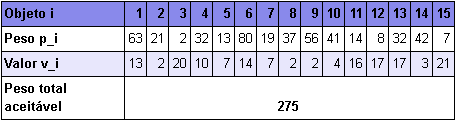

In [4]:
import numpy as np

In [93]:
mochila = Knapsack([])
tabu_search(mochila, 3, 5)
print("Itens na mochila:",mochila.best_inside)
print("Peso Total:",mochila.best_weight)
print("Valor Total:",mochila.best_value)

Itens na mochila: [1, 2, 3, 4, 5, 6, 7, 8, 15]
Peso Total: 274
Valor Total: 96


In [68]:
#---------------------------------------------------------------------------------------------------------
#--Classe mochila ----------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------
weight_capacity = 275
wv_i = [(63,13), (21,2), (2,20), (32,10), (13, 7), (80,14), (19,7), (37,2), (56,2), (41,4), (14,16), (8, 17), (32,17), (42,3), (7,21)]

class Knapsack:
  
  def __init__(self, state = []):
    self.state = state
    self.weight = sum(i for i,_ in self.state)
    self.value = sum(i for _,i in self.state)
    self.inside = [i for i in range(len(wv_i)) if wv_i[i] in state] 
    self.best = state
    self.best_value = self.value
    self.best_weight = self.weight
    self.best_last_change = 0
    self.best_inside = self.inside

  def swap(self, index_i, index_j):
    self.state[:] = [wv_i[index_j] if x== wv_i[index_i] else x for x in self.state]
    self.value -= wv_i[index_i][1]
    self.value += wv_i[index_j][1]
    self.weight -= wv_i[index_i][0]
    self.weight += wv_i[index_j][0]
    self.inside.remove(index_i)
    self.inside.append(index_j)

  def push(self, index):
    self.state.append(wv_i[index])
    self.value += wv_i[index][1]
    self.weight += wv_i[index][0]
    self.inside.append(index)
  

In [91]:
#Inicializa Tabela Tabu
tabu = np.zeros((len(wv_i)+1, len(wv_i)+1))

In [92]:
#Busca Tabu
def tabu_search(knapsack, aspiration, interations):
  while knapsack.best_last_change <= interations:
    n = get_neighbors(knapsack)
    bf = best_five(n)
    if not bf: return
    s = get_solution(bf, knapsack)
    update_tabu(aspiration, s)
    update_state(knapsack, s)


In [78]:
#Define as soluções vizinhas
def get_neighbors(knapsack):
  n = []
  dont_check = knapsack.inside.copy()
  #Troca
  for i in knapsack.inside:
    for j in range(len(wv_i)):
      if not is_in (dont_check, j):
        new_weight = knapsack.weight + wv_i[j][0] 
        if (new_weight <= weight_capacity):
          n.append((i+1, j+1, wv_i[i][1]))

  #Adiciona Item
  for i in range(len(wv_i)):
    new_weight = knapsack.weight + wv_i[i][0] 
    if (new_weight <= weight_capacity and not is_in(knapsack.inside, i)):
      n.append((0, i+1, wv_i[i][1]))
  return n

In [77]:
def is_in(a, elt):
  for i in a:
    if i == elt:
      return True
  return False

In [76]:
#Seleciona as 5 melhores soluções
def best_five(neighbors):
  
  bf = []
  
  for n in neighbors:
      i=0
  
      while i < len(bf):
        if n[2] > bf[i][2]:
          bf.insert(i,n)
          break
        i+=1
  
      if i == len(bf):
          bf.append(n)
  
      if len(bf) > 5:
        bf.pop()
  
  return bf

In [75]:
#Seleciona proxima solução
def get_solution(best_solutions, knapsack):
  
  for solution in best_solutions:
    
    if solution[2] > knapsack.value:
      return solution
    
    if tabu[solution[0]-1][solution[1]-1]:
      if solution == best_solutions[-1]:
        return best_solutions[0]
      continue
    
    return solution

In [82]:
#Atualiza tabela tabu
def update_tabu(aspiration, new_solution):

  for i in range(len(tabu)):
    for j in range(len(tabu)):
      if tabu[i][j]: tabu[i][j] -= 1 
  if new_solution[0]:
    tabu[new_solution[0]-1][new_solution[1]-1] = aspiration
    tabu[new_solution[1]-1][new_solution[0]-1] += 1
  else:
    tabu[new_solution[0]][new_solution[1]-1] = aspiration
    tabu[new_solution[1]-1][new_solution[0]-1] += 1

In [83]:
#Atualiza mochila
def update_state(knapsack, new_solution):
  
  if new_solution[0]:
    knapsack.swap(new_solution[0]-1, new_solution[1]-1)
  else:
    knapsack.push(new_solution[1]-1)
    
  if knapsack.value > knapsack.best_value:
     knapsack.best = knapsack.state
     knapsack.best_value = knapsack.value
     knapsack.best_weight = knapsack.weight
     knapsack.best_last_change = 0
     knapsack.best_inside = [i+1 for i in knapsack.inside]
  else: knapsack.best_last_change += 1